In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Data generation

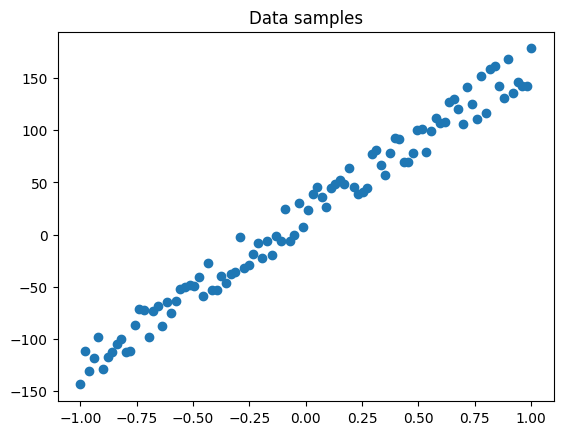

In [15]:
# generating data samples
x = np.linspace(-5.0, 5.0, 100)[:, np.newaxis]
y = 29 * x + 40 * np.random.rand(100,1)

# normalization of input data
x /= np.max(x)

plt.title('Data samples')
plt.scatter(x, y);

## Sklearn Linear regression

Sklearn MSE:  154.68805168997577


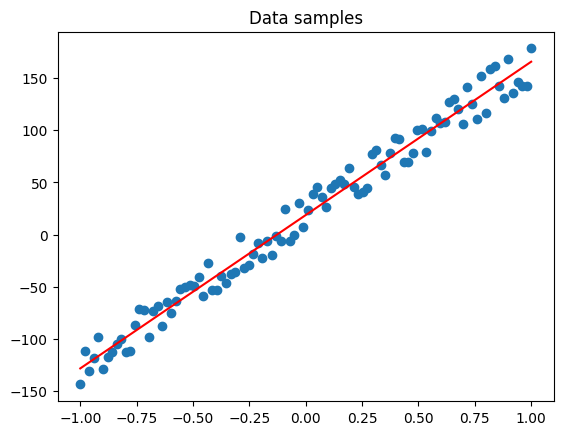

In [16]:
sklearn_model = LinearRegression()
sklearn_model.fit(x, y)
y_hat_sklearn = sklearn_model.predict(x)

plt.title('Data samples')
plt.scatter(x, y)
plt.plot(x, y_hat_sklearn, color='r');

print('Sklearn MSE: ', mean_squared_error(y, y_hat_sklearn))

## Implementation of Linear Regression from scratch

In [33]:
class MyLinearRegression:
    def __init__(self, weights_init='random', add_bias = True, learning_rate=1e-5,
        num_iterations=1000, verbose=False, max_error=1e-5):
        ''' Linear regression model using gradient descent

        # Arguments
            weights_init: str
                weights initialization option ['random', 'zeros']
            add_bias: bool
                whether to add bias term
            learning_rate: float
                learning rate value for gradient descent
            num_iterations: int
                maximum number of iterations in gradient descent
            verbose: bool
                enabling verbose output
            max_error: float
                error tolerance term, after reaching which we stop gradient descent iterations
        '''

        self.num_iterations = num_iterations
        self.learning_rate = learning_rate
        self.weights_init = weights_init
        self.add_bias = add_bias
        self.verbose = verbose
        self.max_error = max_error

    def initialize_weights(self, n_features):
        ''' weights initialization function '''
        if self.weights_init == 'random':
            weights = np.random.randn(n_features, 1)
        elif self.weights_init == 'zeros':
            weights = np.zeros((n_features, 1))
        else:
            raise NotImplementedError
        return weights

    def cost(self, target, pred):
        ''' calculate cost function '''
        loss = (1/(2 * len(target))) * np.sum(np.square(pred - target))
        return loss

    def fit(self, x, y):
        if self.add_bias:
            x = np.hstack((np.ones_like(x), x))

        self.weights = self.initialize_weights(x.shape[1])

        for i in range(self.num_iterations):
            # step 1: calculate current_loss value
            current_loss = self.cost(y, x.dot(self.weights))

            # step 2: calculate gradient value
            gradient = (1/len(y)) * x.T.dot(x.dot(self.weights) - y)

            # step 3: update weights using learning rate and gradient value
            self.weights -= self.learning_rate * gradient

            # step 4: calculate new_loss value
            new_loss = self.cost(y, x.dot(self.weights))

            # step 5: if new_loss and current_loss difference is greater than max_error -> break;
            if abs(new_loss - current_loss) < self.max_error:
                if self.verbose:
                    print(f"Converged in {i} iterations")
                break

    def predict(self, x):
        ''' prediction function '''
        if self.add_bias:
            x = np.hstack((np.ones_like(x), x))
        y_hat = x.dot(self.weights)
        return y_hat

## My Linear Regression Result Visualization

My MSE:  154.69096015848757


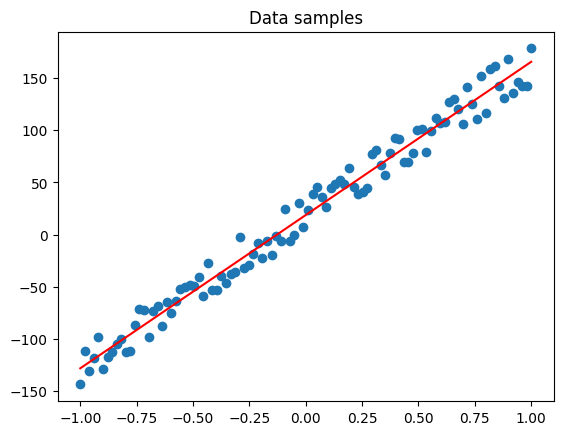

In [36]:
my_model = MyLinearRegression(learning_rate=0.01, num_iterations=5000)
my_model.fit(x, y)
y_hat = my_model.predict(x)

plt.title('Data samples')
plt.scatter(x, y)
plt.plot(x, y_hat, color='r');

print('My MSE: ', mean_squared_error(y, y_hat))

## My Linear Regression VS Sklearn Linear regression

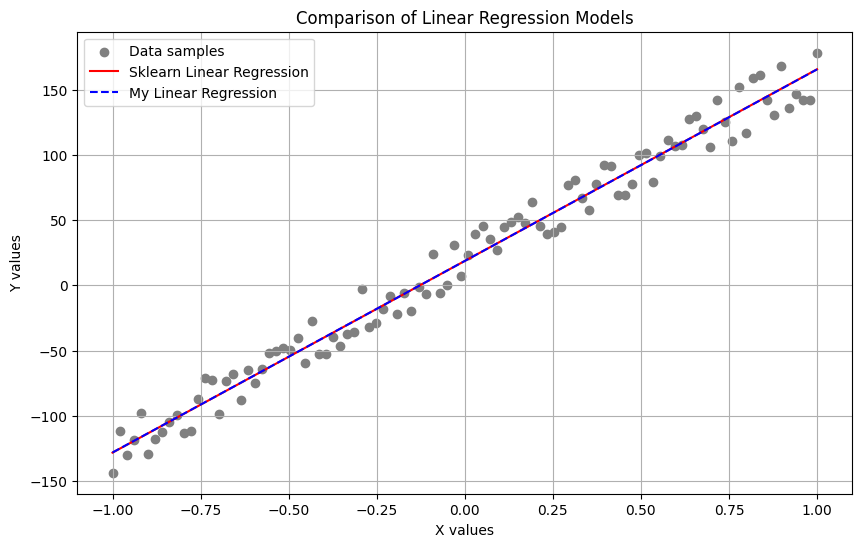

In [35]:
plt.figure(figsize=(10, 6))

# Scatter plot of data samples
plt.scatter(x, y, color='gray', label='Data samples')

# Line plot for Sklearn's Linear Regression model
plt.plot(x, y_hat_sklearn, color='red', label='Sklearn Linear Regression')

# Line plot for MY Linear Regression model
plt.plot(x, y_hat, color='blue', linestyle='--', label='My Linear Regression')

# Title and labels
plt.title('Comparison of Linear Regression Models')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.grid(True)
plt.show()